In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-science-bowl-2019/test.csv
/kaggle/input/data-science-bowl-2019/specs.csv
/kaggle/input/data-science-bowl-2019/train.csv
/kaggle/input/data-science-bowl-2019/train_labels.csv
/kaggle/input/data-science-bowl-2019/sample_submission.csv
/kaggle/input/temp-ds-bowl-2019/labels_created
/kaggle/input/temp-ds-bowl-2019/df_counter_ini
/kaggle/input/temp-ds-bowl-2019/test_all_users.pkl
/kaggle/input/temp-ds-bowl-2019/all_users.pkl


In [2]:
import IPython

def display(*dfs):
    for df in dfs:
        IPython.display.display(df)
        
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
%time df = pd.read_csv('/kaggle/input/data-science-bowl-2019/train.csv', engine='c')
# labels = pd.read_csv('/kaggle/input/data-science-bowl-2019/train_labels.csv')
df_test = pd.read_csv('/kaggle/input/data-science-bowl-2019/test.csv')
specs = pd.read_csv('/kaggle/input/data-science-bowl-2019/specs.csv')

df = reduce_mem_usage(df)
# labels = reduce_mem_usage(labels)
df_test = reduce_mem_usage(df_test)
specs = reduce_mem_usage(specs)

CPU times: user 1min 23s, sys: 15.9 s, total: 1min 39s
Wall time: 1min 39s
Mem. usage decreased to 778.73 Mb (18.2% reduction)
Mem. usage decreased to 79.40 Mb (18.2% reduction)
Mem. usage decreased to  0.01 Mb (0.0% reduction)


In [4]:
df_counter = pd.read_feather('/kaggle/input/temp-ds-bowl-2019/df_counter_ini')
#df_counter = pd.read_feather('/kaggle/input/temp-ds-bowl-2019/df_counter')
labels = pd.read_feather('/kaggle/input/temp-ds-bowl-2019/labels_created')


/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:117: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_feather(path, columns=columns, nthreads=int_use_threads)
/opt/conda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [5]:
all_users = pd.read_pickle('/kaggle/input/temp-ds-bowl-2019/all_users.pkl')
all_users.installation_id.unique().shape, labels.installation_id.unique().shape

test_all_users = pd.read_pickle('/kaggle/input/temp-ds-bowl-2019/test_all_users.pkl')
test_all_users.installation_id.unique().shape, test_all_users.shape

((1000,), (1000, 103))

In [6]:
import gc
gc.collect()

22

# Part I - Create all_users
## One user

In [7]:
#user_id, user = next(iter(df.groupby('installation_id')))
user_id = 'ea49ea9c'#'29d1aaee' # '3f0dca37'
user = df[df.installation_id == user_id].copy()

totall_attempts = labels[labels.installation_id == user_id].total_attempts.sum()
print(totall_attempts)

totall_assessments  = labels[labels.installation_id == user_id].shape[0]
totall_assessments

74


11

In [8]:
labels[labels.installation_id == user_id]

,game_session,world,type,timestamp,num_correct,total_attempts,installation_id,title,accuracy,num_incorrect,accuracy_group
17,006987623dd64d70,TREETOPCITY,Assessment,2019-10-03 21:09:29.026000+00:00,0,15,ea49ea9c,Bird Measurer (Assessment),0.0,15,0
4809,4656dfff269f9c34,TREETOPCITY,Assessment,2019-10-04 01:18:05.553000+00:00,0,15,ea49ea9c,Bird Measurer (Assessment),0.0,15,0
7086,672887587e2acea0,TREETOPCITY,Assessment,2019-10-04 18:17:55.042000+00:00,0,13,ea49ea9c,Bird Measurer (Assessment),0.0,13,0
7229,694ca296a653c7b1,TREETOPCITY,Assessment,2019-10-04 15:04:29.364000+00:00,0,4,ea49ea9c,Bird Measurer (Assessment),0.0,4,0
8992,82c87eb1c81685e3,TREETOPCITY,Assessment,2019-10-03 23:02:54.805000+00:00,0,4,ea49ea9c,Bird Measurer (Assessment),0.0,4,0
10258,955e711cd3e5bd0c,TREETOPCITY,Assessment,2019-10-06 18:40:13.354000+00:00,0,7,ea49ea9c,Bird Measurer (Assessment),0.0,7,0
10859,9dbef9648774e85a,TREETOPCITY,Assessment,2019-10-04 02:17:18.878000+00:00,0,4,ea49ea9c,Bird Measurer (Assessment),0.0,4,0
11209,a2bd92a6abfec052,TREETOPCITY,Assessment,2019-10-03 21:17:15.638000+00:00,0,6,ea49ea9c,Bird Measurer (Assessment),0.0,6,0
12321,b2f1b3ab52b234ea,TREETOPCITY,Assessment,2019-10-04 01:11:03.733000+00:00,0,4,ea49ea9c,Bird Measurer (Assessment),0.0,4,0
16066,e899df9cb52274df,TREETOPCITY,Assessment,2019-10-06 20:09:36.414000+00:00,0,1,ea49ea9c,Bird Measurer (Assessment),0.0,1,0


In [9]:
user['timestamp'] = pd.to_datetime(user['timestamp'])
print(user.shape)
user.sort_values(by='timestamp').head()

user['attempt'] = ((user.type == 'Assessment') &
                       (((user.event_code == 4100) & (user.title != 'Bird Measurer (Assessment)')) |
                        ((user.event_code == 4110)&(user.title == 'Bird Measurer (Assessment)')) )
                   ).astype('int8')
#attempt_idx = user[user.attempt == 1].index
assert user.attempt.sum() == totall_attempts

user['correct'] = 0
user.loc[user.attempt == 1, 'correct'] = user[user.attempt == 1].event_data.str.contains('"correct":true').astype('int8')
#user

(7431, 11)


In [10]:
accuracy_to_group = {1: 3, 0.5: 2, 0: 0}

def get_common_data(session, user_data, user_temp, user_results, test=False):
    """
    params: 
        session: DataFrame - one session form groupby('game_session')
        user_data: dict - dict with data info about user. Accumulate all infor for user though attempts.
    return:
        user_results: list - list of dictionaries, one for each attempt of one user
    """
#     display(session)
    
    data_type = session.type.iloc[0]
    world = session.world.iloc[0]
    template = world +'_'+ data_type
    user_temp[template+'_unique'] = user_temp.get(template+'_unique', [])
    user_data['total_' + data_type+'_unique'] = user_data.get('total_' + data_type+'_unique', [])
    
    if data_type == 'Assessment' and (session.attempt.sum() >= 1 or test):  
        attempt = user_data.copy()
        #print(user_data['total_accuracy'])
        temp = user_temp.copy()
        attempt['total_accuracy'] = np.mean(temp['total_accuracy']) \
                                 if isinstance(temp['total_accuracy'], list) else -1
        attempt['total_accuracy_groups'] = np.mean(temp['total_accuracy_groups']) \
                                        if isinstance(temp['total_accuracy_groups'], list) else -1
        
        #print(attempt)
        
        attempt['curr_attempt_world'] = world
        attempt['curr_attempt_title'] = session.title.iloc[0]
        attempt['curr_attempt_start_time'] = session.timestamp.iloc[0]
        attempt['curr_attempt_duration'] = attempt['time_start'] - attempt['curr_attempt_start_time']
        
        # to labels
        attempt['n_correct'] = session.correct.sum()
        attempt['n_incorrect'] = session.attempt.sum() - attempt['n_correct']
        
        # TOTAL info
        for t in ['Clip', 'Game', 'Activity', 'Assessment']:
            attempt['total_' + t +'_unique'] = len(set(attempt['total_' + t +'_unique'])) \
                                                    if isinstance(attempt['total_' + t +'_unique'], list) \
                                                    and len(attempt['total_' + t +'_unique']) >0 else 0
        
        
        # current WORLD - write all previous info in current world
        features = [x for x in user_temp.keys() if world in str(x)]
        temp = defaultdict(int)
#         print('temp2', user_temp)
        temp.update({k.replace(world, 'world'):user_temp[k] for k in features})
#         print('world', temp)
        f = [x.replace(world, 'world') for x in features if 'unique' in x]
        assert len(f) <= 4
        temp.update({k: len(set(temp[k])) for k in f})
        temp['world_accuracy'] = np.mean(temp['world_accuracy']) \
                                 if isinstance(temp['world_accuracy'], list) else -1
        temp['world_accuracy_groups'] = np.mean(temp['world_accuracy_groups']) \
                                        if isinstance(temp['world_accuracy_groups'], list) else -1
        
        f = [x for x in features if 'game_time' in x]
        temp['world_total_game_time'] = np.sum([user_temp[x] for x in f])
        f = [x for x in features if 'event_count' in x]
        temp['world_total_event_count'] = np.sum([user_temp[x] for x in f])
        f = [x for x in features if 'n_game_session' in x]
        temp['world_total_n_game_session'] = np.sum([user_temp[x] for x in f])
        attempt.update(temp)
        
        # current TITLE - write all previous info in attempts with the same title
        title = session.title.iloc[0]
        features = [x for x in user_temp.keys() if title in str(x)]
        temp = defaultdict(int)
        temp.update({k.replace(title, 'title'):user_temp[k] for k in features})
        temp['title_accuracy'] = np.mean(temp['title_accuracy']) \
                                 if isinstance(temp['title_accuracy'], list) else -1
        temp['title_accuracy_groups'] = np.mean(temp['title_accuracy_groups']) \
                                        if isinstance(temp['title_accuracy_groups'], list) else -1
        attempt.update(temp)
        
        user_results.append(attempt)
        
        #  ======= Save infro for future attempt ======        
        # current title - CALCULATE (accumulate) all previous info in attempts with the same title
        user_temp[title + '_n_assessments'] += 1
        user_temp[title + '_n_attempts'] += session.attempt.sum()
        user_temp[title + '_n_correct'] += session.correct.sum()
        user_temp[title + '_n_incorrect'] = user_temp[title + '_n_attempts'] - user_temp[title + '_n_correct']
        user_temp[title + '_n_unfinished'] += 0  if session.attempt.sum() > 0 else 1
        
        if session.attempt.sum() != 0:
            accuracy = session.correct.sum()/ session.attempt.sum()
            user_temp[title + '_accuracy'] = user_temp.get(title+'_accuracy_groups', []) +[accuracy]
            group = accuracy_to_group.get(accuracy, 1)
            user_temp[title+'_accuracy_groups'] = user_temp.get(title+'_accuracy_groups', []) +[group]
        else:
            print('# Attemps == 0', session.installation_id)
        user_temp[title + '_event_count'] += session.shape[0]
        user_temp[title + '_game_time'] += session.game_time.max()
        
        # Currect attempts - to future
        user_temp[world+'_n_correct'] += attempt['n_correct'] 
        user_temp[world+'_n_incorrect'] += attempt['n_incorrect']
        user_data['total_n_correct'] += attempt['n_correct'] 
        user_data['total_n_incorrect'] += attempt['n_incorrect'] 
        
        if attempt['n_correct']+attempt['n_incorrect'] != 0:
            accuracy = attempt['n_correct']/ (attempt['n_correct']+attempt['n_incorrect'])
            user_temp[world+'_accuracy'] = user_temp.get(world+'_accuracy', []) +[accuracy]
            group = accuracy_to_group.get(accuracy, 1)
            user_temp[world+'_accuracy_groups'] = user_temp.get(world+'_accuracy_groups', []) +[group]
            
            accuracy = attempt['n_correct']/ (attempt['n_correct']+attempt['n_incorrect'])
            user_temp['total_accuracy'] = user_temp.get('total_accuracy', []) +[accuracy]
            group = accuracy_to_group.get(accuracy, 1)
            user_temp['total_accuracy_groups'] = user_temp.get('total_accuracy_groups', []) +[group]
        
        # else - mean was not any attempt and do not add 0 result to sum
        
        
        
    event_code_counts = session['event_code'].value_counts()
    for i, j in zip(event_code_counts.index, event_code_counts.values):
        user_data[i] = user_data.get(i,0) + j
        
    # add common info, include attempt info for next study
    user_temp[template+'_unique'].append(session.title.iloc[0])
    user_temp[template+'_n_game_session'] += 1
    user_temp[template+'_event_count'] += session.shape[0]
    
    template_total = 'total_' + data_type
    user_data[template_total+'_unique'].append(session.title.iloc[0])
    user_data[template_total+'_n_game_session'] += 1
    user_data[template_total+'_event_count'] += session.shape[0]
    
    if data_type != 'Clip':
        user_temp[template+'_game_time'] += session.game_time.max()
        user_data[template_total+'_game_time'] += session.game_time.max()
        user_data['total_game_time'] += session.game_time.max()
        
    user_data['total_' + data_type] += 1
    user_data['total_n_game_session'] += 1
    user_data['total_event_count'] += session.shape[0]
    
        
        
    return user_results


In [11]:
%%time 
user_results = []

from collections import defaultdict
user_data, user_temp = defaultdict(int), defaultdict(int)
user_data['installation_id'] = user.installation_id.iloc[0]
user_data['time_start'] = user.timestamp.iloc[0]

for i, session in user.groupby('game_session', sort=False):
    #print(user_data)
    get_common_data(session, user_data, user_temp, user_results)
    
tt = pd.DataFrame(user_results)

CPU times: user 1.69 s, sys: 12 ms, total: 1.7 s
Wall time: 1.7 s


## Total: for all users

### Info for last attemp

In [12]:
def create_all_users(df, test=False):
    global labels
    all_users = pd.DataFrame()
    
    if test: labels = df  # all unique users with attemptions; for test - all users
    for n,user_id in enumerate(labels.installation_id.unique()):
        # print(n, user_id)
        user = df[df.installation_id == user_id].copy()
        user['timestamp'] = pd.to_datetime(user['timestamp'])
        user.sort_values(by='timestamp', inplace=True)

        user['attempt'] = ((user.type == 'Assessment') &
                           (((user.event_code == 4100) & (user.title != 'Bird Measurer (Assessment)')) |
                            ((user.event_code == 4110)&(user.title == 'Bird Measurer (Assessment)')) )
                       ).astype('int8')

        user['correct'] = 0
        user.loc[user.attempt == 1, 'correct'] = user[user.attempt == 1]\
                                                .event_data.str.contains('"correct":true').astype('int8')

        user_results = []

        user_data, user_temp = defaultdict(int), defaultdict(int)
        user_data['installation_id'] = user.installation_id.iloc[0]
        user_data['time_start'] = user.timestamp.iloc[0]
        
        for i, session in user.groupby('game_session', sort=False):
            get_common_data(session, user_data, user_temp, user_results, test=test)

        temp = all_users.shape
        all_users = pd.concat((all_users,pd.DataFrame(user_results)), ignore_index=True, sort=False)
        
        assert all_users.shape > temp, user_id
#         display(all_users)
#         input()
    
    return all_users

In [13]:
all_users = create_all_users(df)

In [14]:
print(all_users.shape, all_users.installation_id.unique().shape)
all_users.columns = all_users.columns.astype(str)
all_users.to_pickle('all_users.pkl')

(17690, 107) (3614,)


# Creating test data

In [15]:
labels.installation_id.unique().shape, df_test.installation_id.unique().shape

((3614,), (1000,))

In [16]:
test_all_users = create_all_users(df_test, test=True)

# Attemps == 0 867    00abaee7
Name: installation_id, dtype: object
# Attemps == 0 3586    01242218
Name: installation_id, dtype: object
# Attemps == 0 3736    017c5718
Name: installation_id, dtype: object
# Attemps == 0 3970    01a44906
Name: installation_id, dtype: object
# Attemps == 0 4922    01bc6cb6
Name: installation_id, dtype: object
# Attemps == 0 5755    02256298
Name: installation_id, dtype: object
# Attemps == 0 6643    0267757a
Name: installation_id, dtype: object
# Attemps == 0 7093    027e7ce5
7094    027e7ce5
7095    027e7ce5
7096    027e7ce5
7097    027e7ce5
Name: installation_id, dtype: object
# Attemps == 0 8380    027e7ce5
8381    027e7ce5
8382    027e7ce5
Name: installation_id, dtype: object
# Attemps == 0 8429    027e7ce5
Name: installation_id, dtype: object
# Attemps == 0 10142    02a29f99
Name: installation_id, dtype: object
# Attemps == 0 10166    0300c576
Name: installation_id, dtype: object
# Attemps == 0 10283    03885368
Name: installation_id, dtype: object

In [17]:
test_all_users = test_all_users.groupby('installation_id', sort=False, as_index=False)\
                            .agg([lambda x: x.iloc[-1]])
test_all_users.columns = [x[0] for x in test_all_users.columns]
test_all_users.reset_index(inplace=True)

In [18]:
print(test_all_users.shape, test_all_users.installation_id.unique().shape)
test_all_users.columns = test_all_users.columns.astype(str)
test_all_users.to_pickle('test_all_users.pkl')

(1000, 107) (1000,)


In [19]:
# with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
#     display(test_all[test_all.index == idx].T)

# Part II - preprocess train data
## Features names

In [20]:
test_all_users.rename(columns={'world_total_game_session': 'world_total_n_game_session'}, inplace=True)
all_users.rename(columns={'world_total_game_session': 'world_total_n_game_session'}, inplace=True)

In [21]:
#test_all_users.columns = test_all_users.columns.astype(str)

c = test_all_users.columns
worlds_columns = [x for x in c if 'world' in x and 'curr' not in x]
title_columns = [x for x in c if 'title' in x and 'curr' not in x]
current_columns = [x for x in c if 'curr' in x] + ['installation_id', 'time_start', 'n_correct', 'n_incorrect', 
                                                   'total_n_game_session', 'total_event_count', 'total_n_correct',
                                                    'total_n_incorrect' ]
total_columns = [x for x in c if 'total' in x and 'world' not in x and x not in current_columns]
event_columns = [x for x in c if x.isdigit()]
all_columns = worlds_columns+title_columns+current_columns+total_columns+event_columns
assert c.shape[0] == len(all_columns), (c.shape[0] ,len(all_columns))

## Fill NAN

In [22]:
test_all_users.fillna(0., inplace=True)

## Work with time

In [23]:
def preprocess_time(test_all_users):
    time_columns = ['time_start', 'curr_attempt_start_time'] 
    for t in time_columns:
        test_all_users[t+'_month'] = test_all_users[t].dt.month
        test_all_users[t+'_day'] = test_all_users[t].dt.day
        test_all_users[t+'_hour'] = test_all_users[t].dt.hour
        test_all_users[t+'_dayofweek'] = test_all_users[t].dt.dayofweek
        test_all_users[t+'_month'] = test_all_users[t].dt.month
        test_all_users[t+'_quarter'] = test_all_users[t].dt.quarter

    t =  'curr_attempt_duration'
    test_all_users[t+'seconds'] = -test_all_users[t].dt.total_seconds()
    test_all_users[t+'hours'] = -test_all_users[t].dt.total_seconds()/60/60
    
def preprocess_game_time(all_user):
    for t in ['Clip', 'Game', 'Assessment', 'Activity', 'total']:
        print('world_'+t+'_game_time_mean')
        if t != 'Clip':
            all_users['world_'+t+'_game_time_mean'] =  all_users['world_'+t+'_game_time']/ \
                                                    all_users['world_'+t+'_n_game_session']
            all_users['world_'+t+'_event_time_mean'] =  all_users['world_'+t+'_game_time']/ \
                                                    all_users['world_'+t+'_event_count']
        
        all_users['world_'+t+'_events_per_session'] = all_users['world_'+t+'_event_count']/ \
                                                    all_users['world_'+t+'_n_game_session']
        
    all_users['title_game_time_mean'] = all_users['title_game_time']/ all_users['title_n_assessments']                                            
    all_users['title_events_mean'] = all_users['title_enemt_count']/ all_users['title_n_assessments']                                            
    #filna(0. )
                
        
    return all_users

In [24]:
title_columns

['title_accuracy',
 'title_accuracy_groups',
 'title_n_assessments',
 'title_n_attempts',
 'title_n_correct',
 'title_n_incorrect',
 'title_n_unfinished',
 'title_event_count',
 'title_game_time']

In [25]:
temp = test_all_users.copy()
temp = preprocess_game_time(temp)
temp['world_Clip_events_per_session']

world_Clip_game_time_mean
world_Game_game_time_mean
world_Assessment_game_time_mean
world_Activity_game_time_mean
world_total_game_time_mean


KeyError: 'title_enemt_count'

In [26]:
preprocess_time(test_all_users)
preprocess_time(all_users)

## Calculate accuracy/accuracy group

In [27]:
temp = test_all_users.copy()

title_columns

['title_accuracy',
 'title_accuracy_groups',
 'title_n_assessments',
 'title_n_attempts',
 'title_n_correct',
 'title_n_incorrect',
 'title_n_unfinished',
 'title_event_count',
 'title_game_time']

# Labels

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='deep')
sns.set_style("dark")

In [29]:
def autolabel(ratio, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for x, t in enumerate(ax.get_xticklabels()):
        f = t.get_text()
        try: f = int(f)
        except: pass
        ax.annotate(f'{ratio[f]:.2f}%',
                    xy=(x, 0),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [30]:
ax = sns.countplot(x='accuracy_group', data=labels);
autolabel(labels.accuracy_group.value_counts()/labels.shape[0]*100, ax)

ValueError: Could not interpret input 'accuracy_group'

# Features: title, type and world

In [31]:
# temp.world = temp.world.astype('category')
# print(temp.world.cat.categories)
# temp.world = temp.world.cat.codes

In [32]:
def df_na(df): return print("There aren't NaNs:",  ~df.isna().all(axis=None))

To compare inital train data with out labels, need to group inital data too

In [33]:
df_group = df.groupby('game_session', as_index=False).agg({'world': lambda x: x.iloc[0],
                                            'title': lambda x: x.iloc[0],
                                            'type': lambda x: x.iloc[0]})

Plot ditributions by categories for inital grouped data and labels_created data. Also for lables_created data plt distribution by accuracy_group

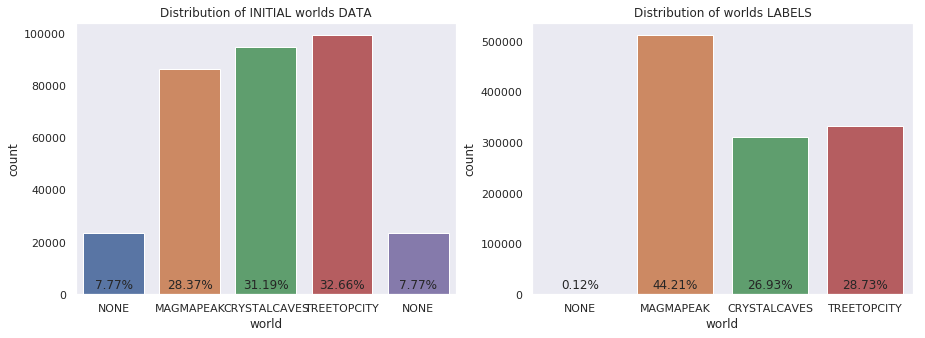

ValueError: Could not interpret input 'accuracy_group'

In [34]:
order = labels.world.unique()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='world', data=df_group , order=np.append(order, 'NONE'))
ax.set_title('Distribution of INITIAL worlds DATA')
autolabel(df_group.world.value_counts()/df_group.shape[0]*100, ax)

plt.subplot(1,2,2)
ax = sns.countplot(x='world', data=labels, order=order);
ax.set_title('Distribution of worlds LABELS');
autolabel(labels.world.value_counts()/labels.shape[0]*100, ax)

plt.show()

ax = sns.countplot(x='world', data=labels, hue='accuracy_group', order=order);
ax.set_title('Distribution of worlds LABELS');

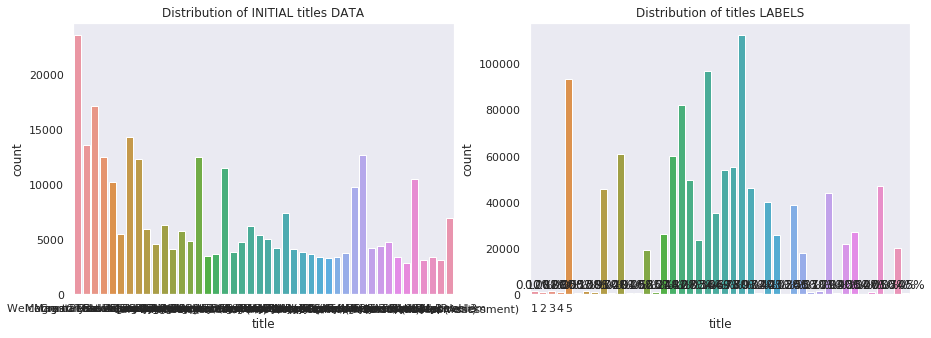

ValueError: Could not interpret input 'accuracy_group'

In [35]:
order = labels.title.unique()
leaved_cat = np.isin(df_group.title.unique(), order)
leaved_cat = df_group.title.unique()[~leaved_cat]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='title', data=df_group , order=np.append(order, leaved_cat))
ax.set_title('Distribution of INITIAL titles DATA')
#autolabel(df.title.value_counts()/df.shape[0]*100, ax)

plt.subplot(1,2,2)
ax = sns.countplot(x='title', data=labels, order=order);
ax.set_title('Distribution of titles LABELS');
autolabel(labels.title.value_counts()/labels.shape[0]*100, ax)
ax.set_xticklabels(['1','2','3','4','5'])

plt.show()

ax = sns.countplot(x='title', data=labels, hue='accuracy_group', order=order);
ax.set_title('Distribution of titels LABELS');
ax.set_xticklabels(['1','2','3','4','5']);
print(order)

**Note:** One can see for title 2 = 'Chest Sorter (Assessment)' most of samples have *accuracy_group* = 0 despire *accuracy_group* = 3 is majority class.

In [36]:
title_unique = labels.title.unique()

# counters for each title_name
counter_title = {'title': [lambda x,y=t: np.sum(x==y) for t in title_unique]}
# last title name
counter_title['title'].append(lambda x: x.iloc[-1])

counter_title.update({'game_session':'count',
                      'timestamp': lambda x: x.iloc[-1]})
counter_title

{'title': [<function __main__.<listcomp>.<lambda>(x, y='Welcome to Lost Lagoon!')>,
  <function __main__.<listcomp>.<lambda>(x, y='Magma Peak - Level 1')>,
  <function __main__.<listcomp>.<lambda>(x, y='Magma Peak - Level 2')>,
  <function __main__.<listcomp>.<lambda>(x, y='Crystal Caves - Level 1')>,
  <function __main__.<listcomp>.<lambda>(x, y='Chow Time')>,
  <function __main__.<listcomp>.<lambda>(x, y='Balancing Act')>,
  <function __main__.<listcomp>.<lambda>(x, y='Crystal Caves - Level 2')>,
  <function __main__.<listcomp>.<lambda>(x, y='Tree Top City - Level 1')>,
  <function __main__.<listcomp>.<lambda>(x, y='All Star Sorting')>,
  <function __main__.<listcomp>.<lambda>(x, y='Costume Box')>,
  <function __main__.<listcomp>.<lambda>(x, y='Fireworks (Activity)')>,
  <function __main__.<listcomp>.<lambda>(x, y='12 Monkeys')>,
  <function __main__.<listcomp>.<lambda>(x, y='Lifting Heavy Things')>,
  <function __main__.<listcomp>.<lambda>(x, y='Cart Balancer (Assessment)')>,
  <fun

In [37]:
columns = ['installation_id', 'title_MS', 'title_CS', 'title_BM', 'title_CB', 'title_CF', 'title_last',
       'n_games', 'timestamp_last']
labels_title = labels.sort_values(by='timestamp').groupby('installation_id', as_index=False)\
                     .agg(counter_title)
labels_title.columns = columns

labels_title.head()

ValueError: Length mismatch: Expected axis has 48 elements, new values have 9 elements

# Look closer on one user

In [38]:
user_id = df_counter.installation_id.value_counts().idxmax()
user_id

'08987c08'

In [39]:
# check that user exists in labels
labels[labels.installation_id == user_id].shape[0] != 0

False

In [40]:
# find all information for user
user = df[df.installation_id == user_id]
user = user.sort_values(by='timestamp')
user.head(), user.shape

(        event_id      game_session                 timestamp  \
 409058  27253bdc  5bc756debd97a313  2019-08-05T16:11:03.928Z   
 409059  27253bdc  534ed88b7459e313  2019-08-05T16:12:29.447Z   
 409060  27253bdc  bb1842c07b8e72da  2019-08-05T16:13:59.361Z   
 409061  27253bdc  65fd8a3d84e9b26a  2019-08-05T16:15:45.628Z   
 409062  27253bdc  e612b7bb56139114  2019-08-05T16:17:27.377Z   
 
                                     event_data installation_id  event_count  \
 409058  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409059  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409060  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409061  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409062  {"event_code": 2000, "event_count": 1}        08987c08            1   
 
         event_code  game_time                    title  type world  
 409058        2000          0  Welcome to Lost Lagoon! 

In [41]:
user['timestamp'] = pd.to_datetime(user['timestamp'])
user.dtypes

event_id                        object
game_session                    object
timestamp          datetime64[ns, UTC]
event_data                      object
installation_id                 object
event_count                      int16
event_code                       int16
game_time                        int32
title                           object
type                            object
world                           object
dtype: object

In [42]:
last_attempt = df_counter[df_counter.installation_id == user_id].iloc[-1]
print(last_attempt.timestamp)

user = user[user.timestamp <= last_attempt.timestamp]
print(user.shape)

2019-09-29 02:33:50.007000+00:00
(11169, 11)


In [43]:
user

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
409058,27253bdc,5bc756debd97a313,2019-08-05 16:11:03.928000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409059,27253bdc,534ed88b7459e313,2019-08-05 16:12:29.447000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409060,27253bdc,bb1842c07b8e72da,2019-08-05 16:13:59.361000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409061,27253bdc,65fd8a3d84e9b26a,2019-08-05 16:15:45.628000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409062,27253bdc,e612b7bb56139114,2019-08-05 16:17:27.377000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
...,...,...,...,...,...,...,...,...,...,...,...
420222,a8efe47b,f32d7e7f77862955,2019-09-29 02:33:46.505000+00:00,"{""weight"":1,""pillars"":[2],""coordinates"":{""x"":8...",08987c08,19,4030,13466,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
420223,0db6d71d,f32d7e7f77862955,2019-09-29 02:33:47.640000+00:00,"{""weight"":1,""destination"":""Lightest"",""coordina...",08987c08,20,4020,14617,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
420224,a8efe47b,f32d7e7f77862955,2019-09-29 02:33:48.424000+00:00,"{""weight"":3,""pillars"":[1,2],""coordinates"":{""x""...",08987c08,21,4030,15383,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
420225,0db6d71d,f32d7e7f77862955,2019-09-29 02:33:48.757000+00:00,"{""weight"":3,""destination"":""Heavy"",""coordinates...",08987c08,22,4020,15733,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
